In [144]:
import pandas as pd

df = pd.read_excel("./data_lampu.xlsx",sheet_name='Data lampu')

df

,No,Nama Produk,Sosial (Proteksi),Ekonomi (Harga),Lingkungan (Daya)
0,1,LEDPRO LPJU VT-LC052-30W,"4,2","Rp2.653.734,00",30
1,2,LEDPRO LPJU VT-LC052-30W,"5,6","Rp2.931.954,00",30
2,3,LEDPRO LPJU VT-LC052-50W,7,"Rp2.955.954,00",50
3,4,LEDPRO LPJU VT-LC060-60W,"8,4","Rp2.950.038,00",60
4,5,LEDPRO LPJU VT-LC075-75W,"10,5","Rp3.408.256,00",75
...,...,...,...,...,...
211,212,FOKUS INDO LIGHTING MARS SS 520 40W,66,"Rp8.749.000,00",40
212,213,FOKUS INDO LIGHTING MARS SS 520 60W,66,"Rp9.314.000,00",60
213,214,FOKUS INDO LIGHTING BIMASAKTI-S SS 30W AC,66,"Rp4.811.000,00",30
214,215,FOKUS INDO LIGHTING SAMBA 615 SS 300W,66,"Rp10.960.000,00",300


Clean data 

In [145]:
def cleaning_data_float(x):
    x = str(x).replace(",", '.')
    return float(x)

def convert_currency_to_number(x):
    x = str(x).replace("Rp","").replace(".", "").replace(",", ".")
    return float(x)


df['Sosial (Proteksi)'] = df['Sosial (Proteksi)'].apply(cleaning_data_float)
df['Ekonomi (Harga)'] = df['Ekonomi (Harga)'].apply(convert_currency_to_number)
df['Lingkungan (Daya)'] = df['Lingkungan (Daya)'].astype(float)
df

,No,Nama Produk,Sosial (Proteksi),Ekonomi (Harga),Lingkungan (Daya)
0,1,LEDPRO LPJU VT-LC052-30W,4.2,2653734.0,30.0
1,2,LEDPRO LPJU VT-LC052-30W,5.6,2931954.0,30.0
2,3,LEDPRO LPJU VT-LC052-50W,7.0,2955954.0,50.0
3,4,LEDPRO LPJU VT-LC060-60W,8.4,2950038.0,60.0
4,5,LEDPRO LPJU VT-LC075-75W,10.5,3408256.0,75.0
...,...,...,...,...,...
211,212,FOKUS INDO LIGHTING MARS SS 520 40W,66.0,8749000.0,40.0
212,213,FOKUS INDO LIGHTING MARS SS 520 60W,66.0,9314000.0,60.0
213,214,FOKUS INDO LIGHTING BIMASAKTI-S SS 30W AC,66.0,4811000.0,30.0
214,215,FOKUS INDO LIGHTING SAMBA 615 SS 300W,66.0,10960000.0,300.0


# Data Normalization

In [146]:
from sklearn.preprocessing import MinMaxScaler

sosial_proteksi = df['Sosial (Proteksi)']
price = df['Ekonomi (Harga)']
daya = df['Lingkungan (Daya)']


print("Min,Max sosical proteksi ",sosial_proteksi.min(),sosial_proteksi.max())
print("Min,Max Price ",price.min(),price.max())
print("Min,Max Lingkungan ",daya.min(),daya.max())

# scaller ready
scaler = MinMaxScaler()

#  manual normalization normalization 
# def min_max_normalize(series):
#     min_val = series.min()
#     max_val = series.max()
#     return (series - min_val) / (max_val - min_val)

# # Normalisasi kolom numerik secara manual
# # for col in ['Sosial (Proteksi)', 'Ekonomi (Harga)', 'Lingkungan (Daya)']:
# #     df[col] = min_max_normalize(df[col])

# # print(df)

# # normalization collumn numericy
cols_to_normalize = ['Sosial (Proteksi)', 'Ekonomi (Harga)', 'Lingkungan (Daya)']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df

Min,Max sosical proteksi  4.1 140.0
Min,Max Price  1918000.0 58742222.0
Min,Max Lingkungan  30.0 500.0


,No,Nama Produk,Sosial (Proteksi),Ekonomi (Harga),Lingkungan (Daya)
0,1,LEDPRO LPJU VT-LC052-30W,0.000736,0.012948,0.000000
1,2,LEDPRO LPJU VT-LC052-30W,0.011038,0.017844,0.000000
2,3,LEDPRO LPJU VT-LC052-50W,0.021339,0.018266,0.042553
3,4,LEDPRO LPJU VT-LC060-60W,0.031641,0.018162,0.063830
4,5,LEDPRO LPJU VT-LC075-75W,0.047093,0.026226,0.095745
...,...,...,...,...,...
211,212,FOKUS INDO LIGHTING MARS SS 520 40W,0.455482,0.120213,0.021277
212,213,FOKUS INDO LIGHTING MARS SS 520 60W,0.455482,0.130156,0.063830
213,214,FOKUS INDO LIGHTING BIMASAKTI-S SS 30W AC,0.455482,0.050911,0.000000
214,215,FOKUS INDO LIGHTING SAMBA 615 SS 300W,0.455482,0.159122,0.574468


# K-Mean

| Jumlah Cluster | Minimal Data (perkiraan) |
| -------------- | ------------------------ |
| 2 - 3          | ≥ 30                     |
| 4 - 6          | ≥ 50 - 100               |
| > 6            | ≥ ratusan                |

Oke Rizki! Aku jelaskan dua metode populer buat **menentukan jumlah cluster terbaik** yaitu **Metode Elbow** dan **Metode Silhouette** secara sederhana dan lengkap.

---

## 1. Metode Elbow

### Apa itu?

Metode Elbow melihat grafik **WCSS (Within-Cluster Sum of Squares)** terhadap jumlah cluster $k$.

* **WCSS** adalah total jarak kuadrat antara setiap data dengan centroid cluster-nya.
* Semakin banyak cluster, WCSS pasti turun (karena data lebih spesifik ke cluster).
* Tapi setelah titik tertentu, penurunan WCSS jadi melambat drastis — itulah titik "elbow" (tekukan).
* Titik elbow ini dianggap sebagai jumlah cluster optimal.

---

### Cara pakai:

* Hitung WCSS untuk berbagai nilai $k$ (misal dari 1 sampai 10 atau lebih)
* Plot grafik $k$ vs WCSS
* Cari titik di grafik yang bentuknya mirip siku/lengkungan

---

## 2. Metode Silhouette

### Apa itu?

Silhouette Score mengukur **seberapa baik data terkelompok** dalam cluster yang dibentuk.

* Nilai silhouette berkisar dari -1 sampai 1.
* Nilai dekat 1 berarti cluster bagus: data dalam cluster rapat dan cluster antar data berbeda jelas.
* Nilai dekat 0 berarti cluster tumpang tindih atau data di tepi cluster.
* Nilai negatif berarti data mungkin salah cluster.

---

### Cara pakai:

* Hitung Silhouette Score untuk berbagai nilai $k$ (minimal $k=2$)
* Plot grafik $k$ vs Silhouette Score
* Pilih $k$ dengan nilai silhouette tertinggi

c:\Program Files\miniconda\envs\machine-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Program Files\miniconda\envs\machine-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Program Files\miniconda\envs\machine-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Program Files\miniconda\envs\machine-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarni

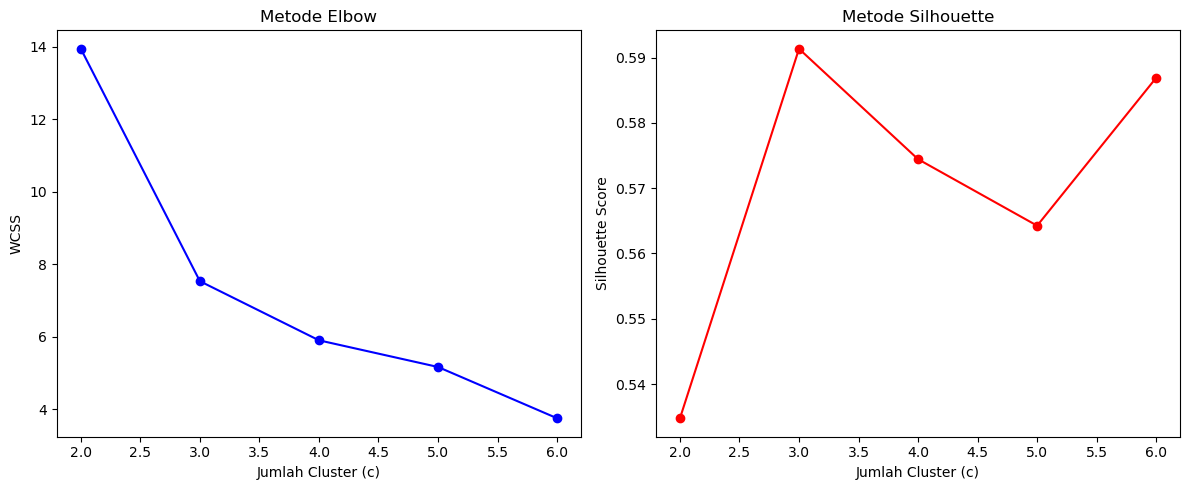

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df_norm = df.copy()
scaler = MinMaxScaler()
k_range = range(2, 7)  # coba cluster dari 2 sampai 6

wcss = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_norm[cols_to_normalize])
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_norm[cols_to_normalize], labels))

# Plot grafik
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Jumlah Cluster (c)')
plt.ylabel('WCSS')
plt.title('Metode Elbow')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (c)')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette')

plt.tight_layout()
plt.show()

# Plot grafik


In [148]:
# berdasarkan pada grafik di atas C 3 sangan curam dan bisaa menggunakan 3 metode Elbow, Silhouette
total_cluster = 3

kmeans = KMeans(n_clusters=total_cluster,random_state=len(df_norm))
kmeans.fit(df_norm[cols_to_normalize])

df_norm['Cluster_ID'] = kmeans.labels_

cluster_names = {}
for i in range(0,total_cluster):
    cluster_names[i] = f"C{i+1}"

df_norm['Cluster'] =df_norm['Cluster_ID'].map(cluster_names)

total_C1 = (df_norm['Cluster'] == 'C1').sum()
total_C2 = (df_norm['Cluster'] == 'C2').sum()
total_C3 = (df_norm['Cluster'] == 'C3').sum()

print("Total C1 :",total_C1)
print("Total C2 :",total_C2)
print("Total C3 :",total_C3)

Total C1 : 152
Total C2 : 48
Total C3 : 16


c:\Program Files\miniconda\envs\machine-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



1. **Evaluasi hasil clustering**

   * Cek apakah jumlah cluster yang dipilih memang masuk akal.
   * Gunakan *Silhouette Score*, *Davies–Bouldin Index*, atau lihat sebaran data di visualisasi 2D/3D untuk menilai kualitas cluster.

2. **Interpretasi cluster**

   * Lihat rata-rata, median, atau distribusi setiap fitur dalam tiap cluster.
   * Beri “karakter” atau “label deskriptif” pada tiap cluster (misal: "Aman”, "Tidak Aman", "Kurang Aman”).

3. **Gunakan cluster untuk analisis lanjutan**

   * Segmentasi: bedakan strategi berdasarkan kelompok (misal marketing berbeda untuk tiap cluster).
   * Prediksi: simpan label cluster sebagai fitur baru untuk model *supervised learning* lain.

4. **Validasi terhadap tujuan bisnis / penelitian**

   * Pastikan hasil clustering benar-benar berguna untuk keputusan yang mau diambil.
   * Jika tidak sesuai, ulangi proses dengan jumlah cluster berbeda, normalisasi data, atau pilih fitur lain.

C:\Users\muham\AppData\Local\Temp\ipykernel_21556\2924844538.py:17: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



Silhouette Score: 0.5913562159586631
Davies-Bouldin Index: 0.7268141000195806
Calinski-Harabasz Score: 189.57421169645696


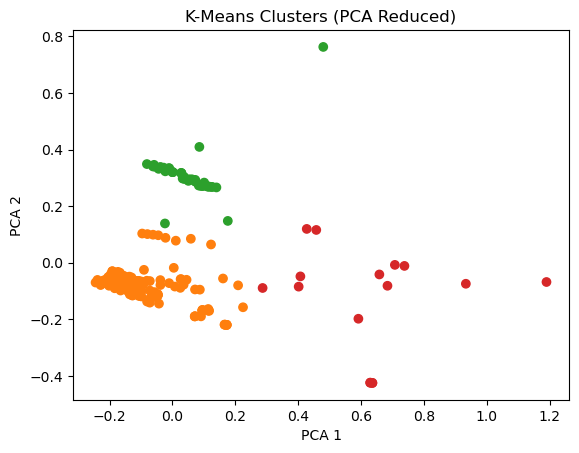

In [149]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA

labels = df_norm['Cluster']
score = silhouette_score(df_norm[cols_to_normalize], labels=labels)
print("Silhouette Score:", score)

dbi = davies_bouldin_score(df_norm[cols_to_normalize], labels=labels)
print("Davies-Bouldin Index:", dbi)

ch_score = calinski_harabasz_score(df_norm[cols_to_normalize], labels)
print("Calinski-Harabasz Score:", ch_score)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_norm[cols_to_normalize])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means Clusters (PCA Reduced)")
plt.show()

# Mengihtung Standar Deviasi & Mean

In [150]:
cols_std = cols_to_normalize
cols_std.append("Cluster")


In [151]:
std_mean = df_norm[cols_std].groupby('Cluster').agg(['mean'])
std_mean

,Sosial (Proteksi),Ekonomi (Harga),Lingkungan (Daya)
,mean,mean,mean
Cluster,,,
C1,0.047660,0.097925,0.132559
C2,0.463331,0.082033,0.110816
C3,0.262969,0.413015,0.730053


In [152]:
std = df_norm[cols_std].groupby('Cluster').agg(['std'])
std

,Sosial (Proteksi),Ekonomi (Harga),Lingkungan (Daya)
,std,std,std
Cluster,,,
C1,0.046377,0.096936,0.118822
C2,0.085933,0.079263,0.072778
C3,0.178516,0.313048,0.234071


# VISUALISASI STANDAR DEVIASI PER CLUSTER

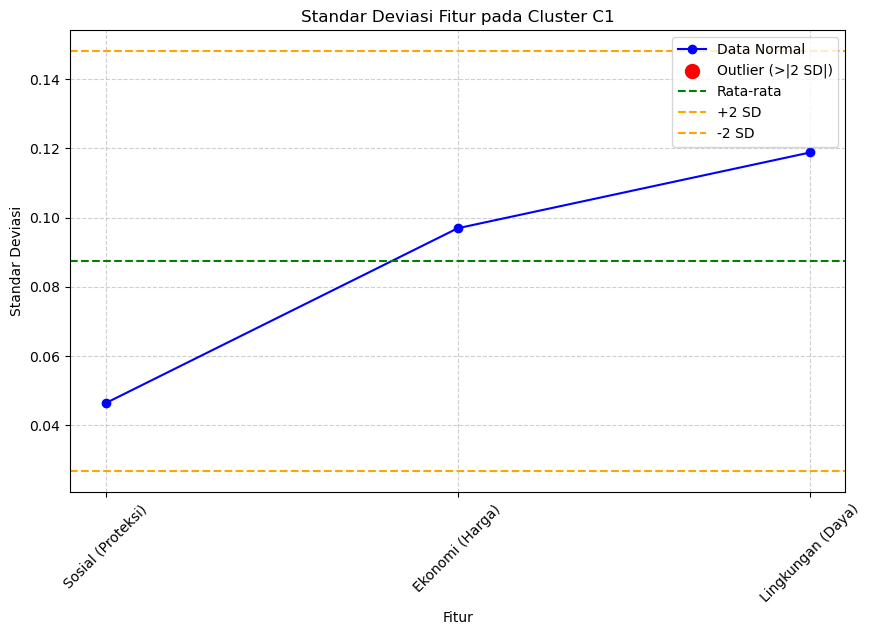

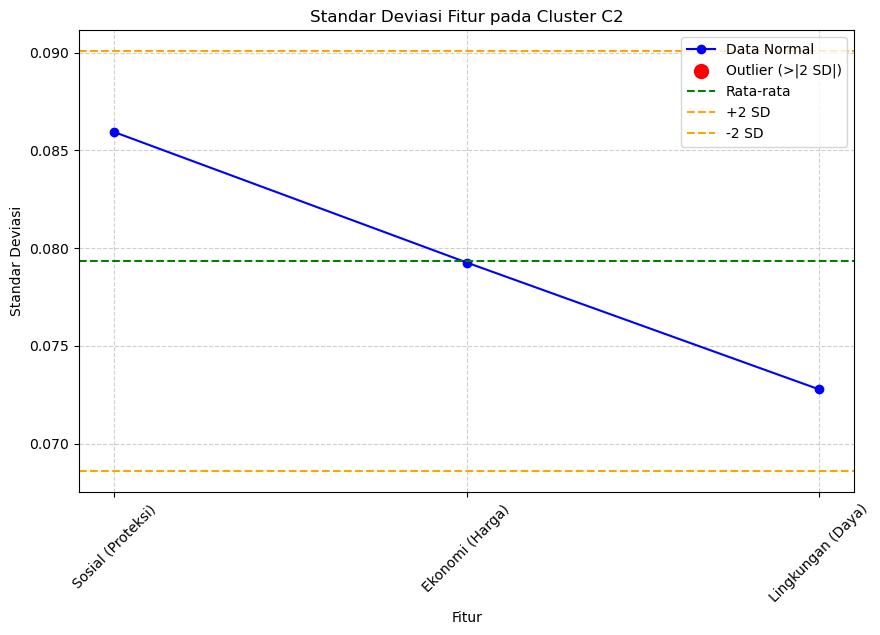

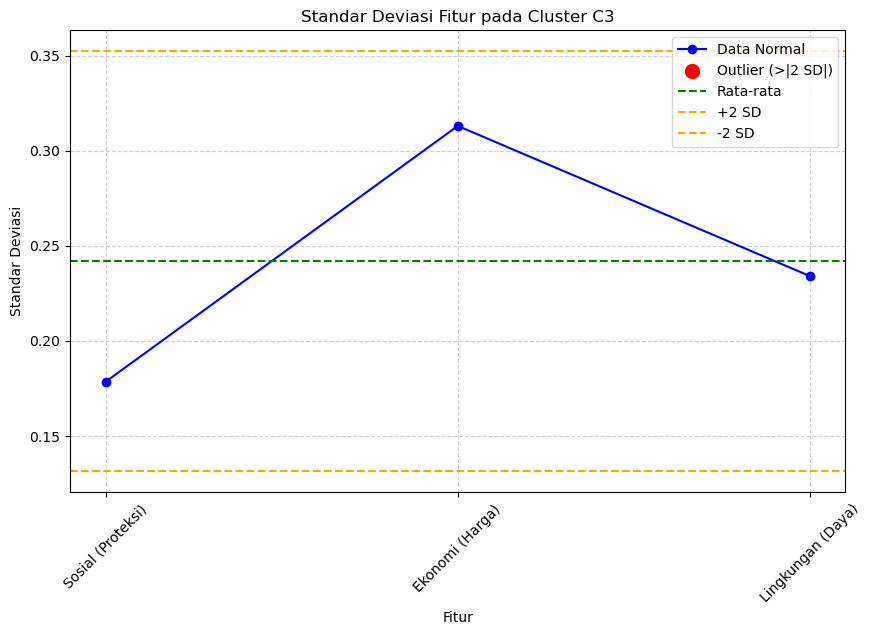

In [153]:
import numpy as np 

std_df = std.copy()
std_df.columns = std_df.columns.droplevel(1)  # hapus level 'std'

# Loop setiap cluster
for cluster_idx in range(len(std_df)):
    values = std_df.iloc[cluster_idx].values
    mean_val = values.mean()
    std_val = values.std(ddof=0)  # populasi

    # Deteksi outlier berdasarkan ±2SD
    z_scores = (values - mean_val) / std_val
    outlier_mask = np.abs(z_scores) > 2

    # Plot line chart
    plt.figure(figsize=(10, 6))
    plt.plot(std_df.columns, values, marker='o', color='blue', label='Data Normal')
    plt.scatter(np.array(std_df.columns)[outlier_mask], values[outlier_mask], color='red', label='Outlier (>|2 SD|)', s=100)

    # Garis rata-rata dan ±2SD
    plt.axhline(mean_val, color='green', linestyle='--', label='Rata-rata')
    plt.axhline(mean_val + 2*std_val, color='orange', linestyle='--', label='+2 SD')
    plt.axhline(mean_val - 2*std_val, color='orange', linestyle='--', label='-2 SD')

    plt.title(f'Standar Deviasi Fitur pada Cluster C{cluster_idx+1}')
    plt.xlabel('Fitur')
    plt.ylabel('Standar Deviasi')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# ANFIS

## OUTPUT LAPISAN 1

Output Lapisan 1 (Derajat Keanggotaan Generalized Bell)
Output lapisan 1 merupakan nilai derajat keanggotaan yang didapatkan 
dengan menggunakan fungsi keanggotaan generalized bell seperti pada 
Persamaan 2.2. Nilai mean (c) dan standar deviasi (a) yang telah didapatkan pada 
proses sebelumnya digunakan sebagai data input untuk menghitung derajat 
keanggotaan yang merupakan output pada lapisan 1. Berikut contoh perhitungan 

In [154]:
import string
norm = df_norm.copy()

def gbellmf(x, a, b, c):
    """
    Fungsi keanggotaan generalized bell.
    Args:
        x : nilai input (bisa scalar atau array)
        a : standar deviasi
        b : parameter bentuk (shape)
        c : mean (center)
    Returns:
        nilai derajat keanggotaan (membership degree)
    """
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

b_val = 1

alphabet = string.ascii_uppercase
# berdasarkan cluseter untuk mendapatkan  µA1 ... , µB1 ... , µC1...
result_gbellmf = pd.DataFrame([])
for i in range(total_cluster):
    gbellmf_label = f"µ{alphabet[i]}"
    norm_filter_by_cluster = norm
    std_val = std_df.iloc[i]
    mean_val = std_mean.iloc[i]
    mf_func = [
        gbellmf(norm_filter_by_cluster['Sosial (Proteksi)'],std_val['Sosial (Proteksi)'],b_val,mean_val['Sosial (Proteksi)']['mean']),
        gbellmf(norm_filter_by_cluster["Ekonomi (Harga)"],std_val["Ekonomi (Harga)"],b_val,mean_val["Ekonomi (Harga)"]['mean']),
        gbellmf(norm_filter_by_cluster["Lingkungan (Daya)"],std_val["Lingkungan (Daya)"],b_val,mean_val["Lingkungan (Daya)"]['mean']),
    ]

    for j in range(len(mf_func)):
        result_gbellmf[f"{gbellmf_label}{j+1}"] = mf_func[j]


result_gbellmf = pd.DataFrame(result_gbellmf)
result_gbellmf

,µA1,µA2,µA3,µB1,µB2,µB3,µC1,µC2,µC3
0,0.494141,0.565455,0.445519,0.033357,0.568284,0.301345,0.316670,0.379764,0.093216
1,0.615930,0.594360,0.445519,0.034840,0.603930,0.301345,0.334264,0.385582,0.093216
2,0.756377,0.596907,0.635414,0.036423,0.607084,0.531985,0.353095,0.386088,0.103876
3,0.893412,0.596278,0.749307,0.038116,0.606305,0.705815,0.373245,0.385963,0.109877
4,0.999851,0.646375,0.912416,0.040880,0.668571,0.958881,0.406114,0.395789,0.119853
...,...,...,...,...,...,...,...,...,...
211,0.012767,0.949789,0.532733,0.991727,0.811680,0.397830,0.462328,0.533381,0.098338
212,0.012767,0.900451,0.749307,0.991727,0.730677,0.705815,0.462328,0.550531,0.109877
213,0.012767,0.809572,0.445519,0.991727,0.866426,0.301345,0.462328,0.427724,0.093216
214,0.012767,0.715019,0.067424,0.991727,0.513905,0.024046,0.462328,0.603218,0.693570


In [155]:

import plotly.graph_objects as go

fig = go.Figure()

for col in result_gbellmf.columns:
    fig.add_trace(go.Scatter(
        x=result_gbellmf.index,
        y=result_gbellmf[col],
        mode='lines',
        name=col
    ))

fig.update_layout(
    title="Membership Function Generalized Bell per Cluster dan Fitur",
    xaxis_title="Data Index",
    yaxis_title="Membership Degree",
    hovermode="x unified"
)

fig.show(renderer="browser")

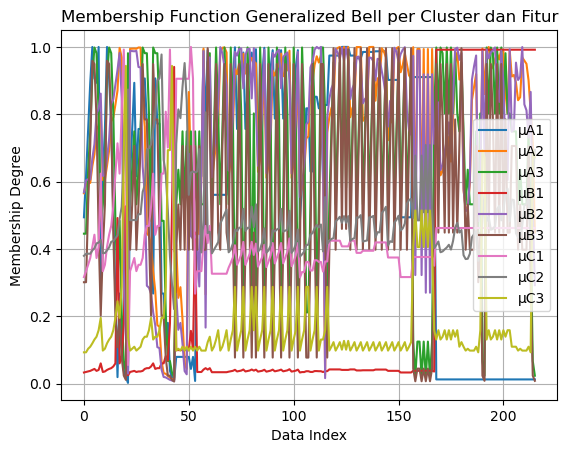

In [156]:
import matplotlib.pyplot as plt

for col in result_gbellmf.columns:
    plt.plot(result_gbellmf.index, result_gbellmf[col], label=col)

plt.xlabel('Data Index')
plt.ylabel('Membership Degree')
plt.title('Membership Function Generalized Bell per Cluster dan Fitur')
plt.legend()
plt.grid(True)
plt.show()

# Output Lapisan 2 (Fire Strength)
Nilai output lapisan 2 merupakan nilai derajat pengaktifan atau biasa disebut 
dengan nilai fire strength (w). Nilai fire strength didapatkan dengan cara 
mengalikan setiap sinyal masukan yang datang dari lapisan sebelumnya seperti 
pada Persamaan 2.12. Berikut contoh perhitungan nilai output lapisan 2

In [157]:
result_fire_strength = pd.DataFrame([])
for i in range(total_cluster):
    result_fire_strength[f"O2,{i+1}"] = result_gbellmf[f'µA{i+1}'] * result_gbellmf[f'µB{i+1}'] * result_gbellmf[f'µC{i+1}']

result_fire_strength
    

,"O2,1","O2,2","O2,3"
0,0.005220,0.122033,0.012515
1,0.007173,0.138405,0.012515
2,0.009728,0.139908,0.035113
3,0.012710,0.139536,0.058111
4,0.016600,0.171039,0.104859
...,...,...,...
211,0.005854,0.411196,0.020841
212,0.005854,0.362216,0.058111
213,0.005854,0.300020,0.012515
214,0.005854,0.221654,0.001124


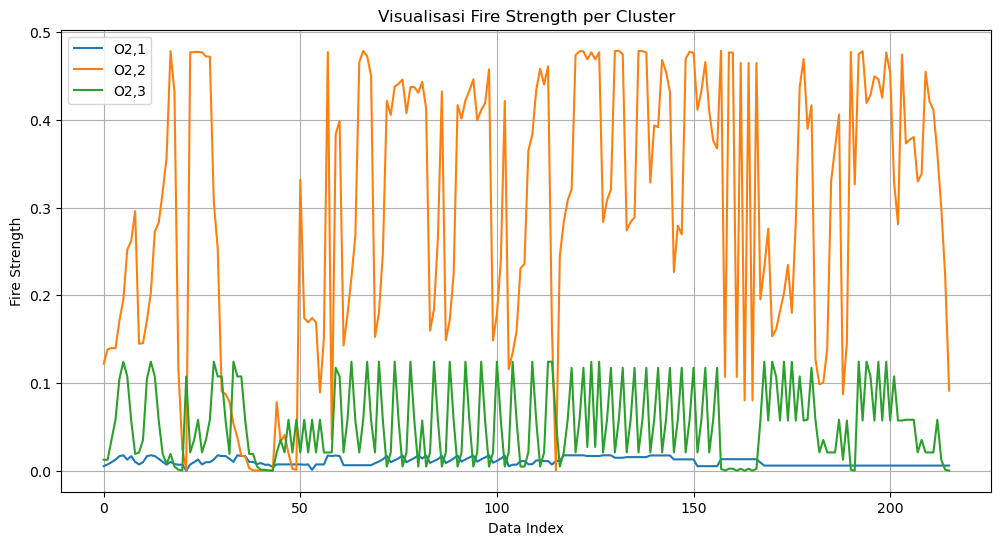

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for col in result_fire_strength.columns:
    plt.plot(result_fire_strength.index, result_fire_strength[col], label=col)

plt.xlabel('Data Index')
plt.ylabel('Fire Strength')
plt.title('Visualisasi Fire Strength per Cluster')
plt.legend()
plt.grid(True)
plt.show()

# Output Lapisan 3 (Normalized Fire Strength)
Pada lapisan ini akan dilakukan perhitungan nilai normalized fire strength. 
Nilai normalized fire strength didapatkan dengan cara melakukan 
standarisasi/normalisasi terhadap nilai fire strength yang didapatkan dari lapisan 
sebelumnya seperti pada Persamaan 2.13. Output dari lapisan ke-3 ini adalah 
nilai fire strength yang sudah terstandarisasi/ternormalisasi. Berikut contoh 
perhitungan normalized fire strength

In [159]:
layer_3_norm = pd.DataFrame([])

def fire_strength_normalize(row):
    total = row.sum()
    if total == 0:
        return row  
    return row / total


normalized_df = result_fire_strength.apply(fire_strength_normalize, axis=1)

for i in range(total_cluster):
    layer_3_norm[f"O3,{i+1}"] = normalized_df.iloc[:, i]

layer_3_norm.head()

,"O3,1","O3,2","O3,3"
0,0.037346,0.873115,0.089539
1,0.045372,0.875468,0.079160
2,0.052654,0.757286,0.190060
3,0.060421,0.663331,0.276248
4,0.056751,0.584753,0.358495


# Perhitungan Parameter Konsekuen dengan Least Square Estimator
(LSE)
Perhitungan nilai parameter konsekuen dengan algoritme LSE berguna untuk 
mencari nilai output pada lapisan ke-4. Berikut langkah-langkah yang harus 
dilakukan untuk mendapatkan nilai parameter konsekuen

In [160]:

matrix_desaign_A = pd.DataFrame([])
for i in range(total_cluster):
    # Kalikan setiap fitur dengan fire strength O2,i+1
    fire_col = layer_3_norm[f'O3,{i+1}'].values.reshape(-1, 1)  # shape (n,1)
    features = norm[['Sosial (Proteksi)', 'Ekonomi (Harga)', 'Lingkungan (Daya)']].values  # shape (n,3)
    multiplied = features * fire_col  # broadcasting element-wise

    # Buat nama kolom untuk fitur c{i+1}{j+1}
    col_names = [f'c{i+1}{j+1}' for j in range(features.shape[1])]

    # Masukkan ke DataFrame matrix_desaign_A
    df_features = pd.DataFrame(multiplied, columns=col_names, index=norm.index)
    # Kolom bias c{i+1}0
    df_bias = pd.DataFrame({f'c{i+1}0': layer_3_norm[f'O3,{i+1}']}, index=norm.index)

    # Gabungkan fitur dan bias
    df_i = pd.concat([df_features, df_bias], axis=1)

    # Tambahkan ke matrix_desaign_A
    matrix_desaign_A = pd.concat([matrix_desaign_A, df_i], axis=1)

matrix_desaign_A

,c11,c12,c13,c10,c21,c22,c23,c20,c31,c32,c33,c30
0,0.000027,0.000484,0.000000,0.037346,0.000642,0.011305,0.000000,0.873115,0.000066,0.001159,0.000000,0.089539
1,0.000501,0.000810,0.000000,0.045372,0.009663,0.015622,0.000000,0.875468,0.000874,0.001413,0.000000,0.079160
2,0.001124,0.000962,0.002241,0.052654,0.016160,0.013833,0.032225,0.757286,0.004056,0.003472,0.008088,0.190060
3,0.001912,0.001097,0.003857,0.060421,0.020988,0.012047,0.042340,0.663331,0.008741,0.005017,0.017633,0.276248
4,0.002673,0.001488,0.005434,0.056751,0.027538,0.015336,0.055987,0.584753,0.016883,0.009402,0.034324,0.358495
...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.006089,0.001607,0.000284,0.013368,0.427714,0.112884,0.019980,0.939037,0.021679,0.005722,0.001013,0.047595
212,0.006256,0.001788,0.000877,0.013735,0.387120,0.110621,0.054250,0.849913,0.062106,0.017747,0.008703,0.136352
213,0.008374,0.000936,0.000000,0.018385,0.429204,0.047974,0.000000,0.942308,0.017903,0.002001,0.000000,0.039306
214,0.011662,0.004074,0.014708,0.025603,0.441580,0.154266,0.556934,0.969478,0.002240,0.000783,0.002825,0.004918


# Matriks Transpose dari Matriks Desain A (A)

In [161]:
transpose_m_a =matrix_desaign_A.transpose()
transpose_m_a

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
c11,0.000027,0.000501,0.001124,0.001912,0.002673,0.003273,0.001080,0.002327,0.003857,0.000458,...,0.005999,0.007478,0.007030,0.005537,0.005953,0.006089,0.006256,0.008374,0.011662,0.027399
c12,0.000484,0.000810,0.000962,0.001097,0.001488,0.001651,0.001455,0.002195,0.001558,0.000814,...,0.000850,0.000918,0.000884,0.000978,0.001542,0.001607,0.001788,0.000936,0.004074,0.012345
c13,0.000000,0.000000,0.002241,0.003857,0.005434,0.006680,0.005085,0.009460,0.007920,0.000883,...,0.000841,0.000349,0.000657,0.000259,0.000278,0.000284,0.000877,0.000000,0.014708,0.053754
c10,0.037346,0.045372,0.052654,0.060421,0.056751,0.052330,0.034143,0.049403,0.031019,0.041522,...,0.013171,0.016417,0.015434,0.012156,0.013071,0.013368,0.013735,0.018385,0.025603,0.060153
c21,0.000642,0.009663,0.016160,0.020988,0.027538,0.036194,0.021423,0.036748,0.113179,0.009248,...,0.389926,0.421381,0.406284,0.430232,0.428332,0.427714,0.387120,0.429204,0.441580,0.427442
c22,0.011305,0.015622,0.013833,0.012047,0.015336,0.018259,0.028859,0.034666,0.045713,0.016419,...,0.055214,0.051707,0.051110,0.075998,0.110962,0.112884,0.110621,0.047974,0.154266,0.192595
c23,0.000000,0.000000,0.032225,0.042340,0.055987,0.073873,0.100842,0.149423,0.232372,0.017826,...,0.054643,0.019684,0.037957,0.020097,0.020008,0.019980,0.054250,0.000000,0.556934,0.838605
c20,0.873115,0.875468,0.757286,0.663331,0.584753,0.578674,0.677082,0.780319,0.910123,0.837836,...,0.856074,0.925132,0.891986,0.944565,0.940393,0.939037,0.849913,0.942308,0.969478,0.938439
c31,0.000066,0.000874,0.004056,0.008741,0.016883,0.023079,0.009137,0.008019,0.007319,0.001332,...,0.059556,0.026623,0.042169,0.019713,0.021196,0.021679,0.062106,0.017903,0.002240,0.000641
c32,0.001159,0.001413,0.003472,0.005017,0.009402,0.011643,0.012308,0.007565,0.002956,0.002364,...,0.008433,0.003267,0.005305,0.003482,0.005491,0.005722,0.017747,0.002001,0.000783,0.000289


# Perkalian Matriks Transpose (AT) dengan Matriks Desain A (ATA)

In [162]:
result_transpose_x_desaign_A = transpose_m_a.dot(matrix_desaign_A)
result_transpose_x_desaign_A

,c11,c12,c13,c10,c21,c22,c23,c20,c31,c32,c33,c30
c11,0.462321,1.095595,0.969322,1.283890,0.208113,0.089678,0.176242,0.667662,0.086578,0.165148,0.094318,0.377501
c12,1.095595,2.833318,2.402247,3.397730,0.089678,0.136756,0.225703,0.640437,0.165148,0.585477,0.300388,1.032260
c13,0.969322,2.402247,2.172084,2.858984,0.176242,0.225703,0.761822,1.321404,0.094318,0.300388,0.199628,0.558594
c10,1.283890,3.397730,2.858984,4.488360,0.667662,0.640437,1.321404,5.641279,0.377501,1.032260,0.558594,2.725349
c21,0.208113,0.089678,0.176242,0.667662,7.646515,1.838895,3.801794,20.449697,1.353358,0.304172,0.416618,3.561397
c22,0.089678,0.136756,0.225703,0.640437,1.838895,1.301849,2.643614,11.508005,0.304172,0.284323,0.215950,1.885336
c23,0.176242,0.225703,0.761822,1.321404,3.801794,2.643614,9.837522,23.755786,0.416618,0.215950,0.384464,2.514736
c20,0.667662,0.640437,1.321404,5.641279,20.449697,11.508005,23.755786,136.674460,3.561397,1.885336,2.514736,22.397313
c31,0.086578,0.165148,0.094318,0.377501,1.353358,0.304172,0.416618,3.561397,1.501067,0.895798,0.360147,2.744979
c32,0.165148,0.585477,0.300388,1.032260,0.304172,0.284323,0.215950,1.885336,0.895798,1.545752,0.507722,3.408604


# invers
Setelah didapatkan hasil perkalian dari matriks transpose AT dan matriks 
desain A (AT
A), langkah selanjutnya adalah menghitung nilai invers dari 
matriks (AT
A). Tabel 4.16 merupakan hasil invers dari matriks (AT
A)

In [163]:
mat = result_transpose_x_desaign_A  # convert ke numpy array

mat_inv_df = None;
try:
    mat_inv = np.linalg.inv(mat)
    # Jika mau hasilnya tetap dalam DataFrame dengan index dan columns sama:
    mat_inv_df = pd.DataFrame(mat_inv, index=result_transpose_x_desaign_A.index, columns=result_transpose_x_desaign_A.columns)
except np.linalg.LinAlgError:
    print("Matriks tidak bisa diinvers karena singular atau tidak invertible.")

mat_inv_df

,c11,c12,c13,c10,c21,c22,c23,c20,c31,c32,c33,c30
c11,64.746858,-18.698940,-19.305291,7.894694,-1.458805,0.100888,0.531678,-0.065348,0.498660,0.114648,14.869979,-2.888453
c12,-18.698940,36.609594,-14.465711,-13.622682,-0.361527,2.609002,1.826432,-0.088606,0.373103,-3.707070,-7.961249,2.534866
c13,-19.305291,-14.465711,24.190227,0.810172,0.946826,-1.607391,-1.694159,0.203345,-1.345265,3.685346,-0.256129,-0.192214
c10,7.894694,-13.622682,0.810172,8.467170,0.106328,-1.155322,-0.447221,-0.059932,0.588341,0.195016,0.728887,-0.881459
c21,-1.458805,-0.361527,0.946826,0.106328,0.317838,-0.221709,-0.056953,-0.020565,-0.270284,0.231677,-0.437874,0.053443
c22,0.100888,2.609002,-1.607391,-1.155322,-0.221709,4.616217,-0.329289,-0.280071,0.329326,-1.210770,1.768714,0.048074
c23,0.531678,1.826432,-1.694159,-0.447221,-0.056953,-0.329289,0.395052,-0.024567,0.044387,-0.284922,-0.807944,0.204258
c20,-0.065348,-0.088606,0.203345,-0.059932,-0.020565,-0.280071,-0.024567,0.047799,-0.009516,0.184000,0.073161,-0.072908
c31,0.498660,0.373103,-1.345265,0.588341,-0.270284,0.329326,0.044387,-0.009516,1.545034,-0.834916,0.136378,-0.196500
c32,0.114648,-3.707070,3.685346,0.195016,0.231677,-1.210770,-0.284922,0.184000,-0.834916,3.295919,-0.524074,-0.659840


Langkah selanjutnya adalah menghitung nilai dari matriks parameter 
konsekuen dengan cara mengalikan antara proses matriks (AT A)-1
dengan 
matriks y yang merupakan target output. Tabel 4.18 merupakan matriks 
parameter konsekuen yang didapatkan dengan menggunakan algoritma LSE
seperti pada Persamaan

In [164]:
target_output = norm.copy()

target_output['Output'] = target_output['Cluster_ID']

target_output = pd.DataFrame(target_output['Output'], columns=["Output"])
target_output

,Output
0,0
1,0
2,0
3,0
4,0
...,...
211,1
212,1
213,1
214,2


In [165]:
y_target = target_output['Output'].values
# Kalikan (A^T A)^-1 dengan A^T
temp = mat_inv_df.dot(transpose_m_a)

# Kalikan hasilnya dengan target output Y
# Pastikan y_target sudah berbentuk DataFrame atau array dengan index/column sesuai
theta = temp.dot(y_target)
# Jika ingin hasil tetap DataFrame:
konsekuen = pd.DataFrame(theta, index=mat_inv_df.index, columns=['parameter_konsekuen'])

konsekuen

,parameter_konsekuen
c11,-7.914042
c12,-1.455120
c13,5.120533
c10,2.370702
c21,3.009750
c22,0.035091
c23,0.929301
c20,-0.299794
c31,1.247863
c32,0.074416


# Output Lapisan 4
Nilai output lapisan 4 merupakan hasil perkalian antara nilai dari output pada 
lapisan 3 dengan parameter konsekuen seperti pada Persamaan 2.14. Langkahlangkah untuk mendapatkan nilai output lapisan 4 a

# menghitung nilai F

In [166]:
X = df_norm[['Ekonomi (Harga)','Sosial (Proteksi)','Lingkungan (Daya)']]

calculation_f_val = pd.DataFrame([])
for i in range(total_cluster):
    calculation_f_val[f'f{i+1}'] = (konsekuen.loc[f'c{i+1}1'].values * X['Sosial (Proteksi)'].values) + (konsekuen.loc[f'c{i+1}2'].values * X['Ekonomi (Harga)'].values) + (konsekuen.loc[f'c{i+1}3'].values * X['Lingkungan (Daya)'].values) + konsekuen.loc[f'c{i+1}0'].values

# akan di gunakan di error lapisan 3
calculation_f_val


,f1,f2,f3
0,2.346039,-0.297125,-0.291795
1,2.257386,-0.265948,-0.278575
2,2.393139,-0.195383,-0.243489
3,2.420710,-0.144609,-0.219542
4,2.450105,-0.068159,-0.183009
...,...,...,...
211,-1.299978,1.095083,0.294748
212,-1.096551,1.134977,0.317688
213,-1.308083,1.072879,0.278491
214,1.476040,1.610530,0.586244


# Menghitung output lapisan 4

Menghitung nilai output lapisan 4 dengan melakukan perkalian antara nilai 
output 
 
lapisan 3 dengan nilai . Berikut perhitungan nilai output lapisan 4:

In [167]:
layer_4 = pd.DataFrame([])
for i in range(total_cluster):
    layer_4[f'O4,{i+1}'] = layer_3_norm[f'O3,{i+1}'].values * calculation_f_val[f'f{i+1}'].values

layer_4 

,"O4,1","O4,2","O4,3"
0,0.087614,-0.259425,-0.026127
1,0.102423,-0.232829,-0.022052
2,0.126008,-0.147961,-0.046278
3,0.146263,-0.095923,-0.060648
4,0.139046,-0.039856,-0.065608
...,...,...,...
211,-0.017378,1.028324,0.014029
212,-0.015061,0.964631,0.043317
213,-0.024050,1.010983,0.010946
214,0.037791,1.561374,0.002883


# Output Lapisan 5
Output lapisan 5 merupakan nilai output jaringan yang didapatkan dari hasil 
penjumlahan seluruh sinyal yang masuk pada lapisan sebelumnya dengan 
menggunakan Persamaan 2.15. Berikut merupakan perhitungan output lapisan 5

In [168]:
layer_5 = layer_4.copy()
layer_5 = layer_5.sum(axis=1)
layer_5

0     -0.197937
1     -0.152458
2     -0.068231
3     -0.010309
4      0.033582
         ...   
211    1.024974
212    0.992887
213    0.997880
214    1.602049
215    1.975350
Length: 216, dtype: float64

# Model Propagasi Error
Model propagasi error bertujuan untuk melakukan perbaikan parameter 
premis yaitu perbaikan nilai mean (c) dan nilai standar deviasi (a) dengan 
menggunakan algoritme steepest descent. Model propagasi error dilakukan 
dengan menghitung nilai error pada setiap lapisan, dimulai dari nilai propagasi 
error pada lapisan 5 hingga lapisan 1. Berikut adalah langkah-langkah untuk 
melakukan perbaikan parameter premis menggunakan algoritme steepest 
descent

Menghitung Propagasi Error Lapisan 5
Tabel 4.22 merupakan perbandingan output jaringan dan output aktual.

In [169]:
O5 = layer_5.values.flatten()
y_actual = df_norm['Cluster_ID'].values

# Hitung error layer 5 saja
error_layer_5 = 2 * (O5 - y_actual)

# Buat index khusus seperti ɛ5,1, ɛ5,2, ...
error_index = [f'ɛ5,{i+1}' for i in range(len(error_layer_5))]

error_layer_5_series = pd.Series(error_layer_5, index=error_index, name='Error Layer 5')

print(error_layer_5_series.head())
means_error_layer5 =  error_layer_5_series.mean()
means_error_layer5

ɛ5,1   -0.395875
ɛ5,2   -0.304917
ɛ5,3   -0.136462
ɛ5,4   -0.020617
ɛ5,5    0.067164
Name: Error Layer 5, dtype: float64


np.float64(-2.837236618486511e-16)

Menghitung Propagasi Error Lapisan 4
Propagasi error lapisan 4 didapatkan dari Persamaan 2.20 dan Persamaan 
2.21. Berdasarkan persamaan tersebut, nilai propagasi error 4 didapatkan dari 
nilai propagasi error lapisan 5. Tabel 4.24 berikut merupakan tabel nilai propagasi 
error lapisan 4.

In [170]:
error_index_layer_4 = [f'ɛ4{alphabet[i]}' for i in range(total_cluster)]
value_error_layer_4 = [means_error_layer5 for i in range(total_cluster)]
error_layer_4 = pd.Series(value_error_layer_4,index=error_index_layer_4,name='Error Layer 4')

error_layer_4

ɛ4A   -2.837237e-16
ɛ4B   -2.837237e-16
ɛ4C   -2.837237e-16
Name: Error Layer 4, dtype: float64

Menghitung Propagasi Error Lapisan 3
Propagasi error lapisan 3 dihitung menggunakan persamaan 2.2

In [171]:
error_layer_3 = calculation_f_val * means_error_layer5
error_layer_3 = pd.DataFrame(data=error_layer_3)
error_layer_3.columns = [f'ɛ3{alphabet[i].lower()}' for i in range(total_cluster)]
error_layer_3

means_error_layer_3 = error_layer_3.mean()
error_layer_3,means_error_layer_3


(              ɛ3a           ɛ3b           ɛ3c
 0   -6.656267e-16  8.430149e-17  8.278911e-17
 1   -6.404739e-16  7.545575e-17  7.903843e-17
 2   -6.789901e-16  5.543477e-17  6.908356e-17
 3   -6.868126e-16  4.102892e-17  6.228913e-17
 4   -6.951528e-16  1.933831e-17  5.192394e-17
 ..            ...           ...           ...
 211  3.688344e-16 -3.107011e-16 -8.362711e-17
 212  3.111174e-16 -3.220198e-16 -9.013570e-17
 213  3.711341e-16 -3.044012e-16 -7.901457e-17
 214 -4.187875e-16 -4.569455e-16 -1.663312e-16
 215 -8.634169e-16 -5.415528e-16 -2.145446e-16
 
 [216 rows x 3 columns],
 ɛ3a   -5.236440e-16
 ɛ3b   -9.465716e-17
 ɛ3c    1.556671e-19
 dtype: float64)

Menghitung Propagasi Error Lapisan 2
Propagasi error lapisan 2 dihitung menggunakan Persamaan 2.24 dan 
Persamaan 2.25. Berikut adalah contoh perhitungan nilai propagasi error lapisan 
2:

 eps2a = ((-8.03285e-11 * (0.01315 + 0.00053)) - 
          (2.84544e-10 * 0.01315) - 
          (-5.20878e-12 * 0.00053)) / ((0.12136 + 0.01315 + 0.00053) ** 2)

 eps2b = ((2.84544e-10 * (0.12136 + 0.00053)) - 
          (-8.03285e-11 * 0.12136) - 
          (-5.20878e-12 * 0.00053)) / ((0.12136 + 0.01315 + 0.00053) ** 2)

 eps2c = ((-5.20878e-12 * (0.12136 + 0.01315)) - 
          (2.84544e-10 * 0.01315) - 
          (-8.03285e-11 * 0.12136)) / ((0.12136 + 0.01315 + 0.00053) ** 2)

rujukan data berdasarkan PDF anfis
-8,03285E-11 2,84544E-10 -5,20878E-12
output lapisan 2
Data Ke- O2,1 O2,2 O2,3
1 0,12136 0,01315 0,00053
2 0,22950 0,04246 0,00015
3 0,90197 0,01871 0,00122
4 0,01843 0,54521 0,00011
5 0,02591 0,51142 0,00010
6 0,00019 0,04555 0,00000
7 0,08291 0,29877 0,00016
8 0,01565 0,00188 0,59224
9 0,01519 0,01795 0,08093
10 0,13973 0,04517 0,002

outputt error

Data ke- ɛ2a ɛ2b ɛ2c
1 -2,65294E-10 2,43681E-09 2,91014E-10
2 -2,09376E-10 1,13149E-09 6,66804E-11
3 -8,14105E-12 3,87644E-10 7,3343E-11
4 -6,25969E-10 2,12545E-11 -4,92719E-10
5 -6,46081E-10 3,28372E-11 -5,06306E-10
6 -7,94509E-09 3,28668E-11 -6,3026E-09
7 -7,47793E-10 2,07796E-10 -5,51057E-10
8 -1,21493E-10 4,76882E-10 1,69975E-12
9 -9,70539E-10 2,22811E-09 -3,12002E-10
10 -4,75354E-10 1,47412E-09 -7,39973E-11
11 -5,34154E-10 2,11441E-09 1,11304E-11
12 -1,4979E-10 5,72968E-10 -9,88805E-13
Rata-Rata -1,05826E-09 9,26432E-10 -6,4965E-10




In [172]:
layer_2 =result_fire_strength.copy()
per_layer = ((layer_2['O2,1'] + layer_2['O2,2'] + layer_2['O2,3']) ** 2)
e2a = ((means_error_layer_3['ɛ3a'] * (layer_2['O2,2'] + layer_2['O2,3'])) - 
         (means_error_layer_3['ɛ3b'] * layer_2['O2,2']) - 
         (means_error_layer_3['ɛ3c'] * layer_2['O2,3'])) / per_layer
e2b = ((means_error_layer_3['ɛ3b'] * (layer_2['O2,1'] + layer_2['O2,2'])) - 
         (means_error_layer_3['ɛ3a'] * layer_2['O2,3']) - 
         (means_error_layer_3['ɛ3c'] * layer_2['O2,3'])) / per_layer
e2c = ((means_error_layer_3['ɛ3c'] * (layer_2['O2,1'] + layer_2['O2,2'])) - 
         (means_error_layer_3['ɛ3b'] * layer_2['O2,2']) - 
         (means_error_layer_3['ɛ3a'] * layer_2['O2,1'])) /per_layer

error_layer_2 = pd.DataFrame([e2a,e2b,e2c])
error_layer_2 = error_layer_2.transpose()

error_layer_2.columns = [f'ɛ2{alphabet[i].lower()}' for i in range(total_cluster)]
error_layer_2_mean = error_layer_2.mean()
error_layer_2,error_layer_2_mean


(              ɛ2a           ɛ2b           ɛ2c
 0   -3.015409e-15 -2.812445e-16  7.322466e-16
 1   -2.637868e-15 -2.892261e-16  6.753718e-16
 2   -2.297274e-15  1.235606e-16  5.379211e-16
 3   -2.040622e-15  3.617858e-16  4.494318e-16
 4   -1.499606e-15  4.340039e-16  2.911761e-16
 ..            ...           ...           ...
 211 -9.768744e-16 -1.489789e-16  2.193122e-16
 212 -1.023094e-15 -2.433648e-17  2.059626e-16
 213 -1.334302e-15 -2.209883e-16  3.108568e-16
 214 -1.830319e-15 -4.007178e-16  4.606964e-16
 215 -4.144465e-15 -9.637519e-16  1.238093e-15
 
 [216 rows x 3 columns],
 ɛ2a   -1.853845e-15
 ɛ2b    1.777846e-16
 ɛ2c    1.901113e-15
 dtype: float64)

Propagasi error lapisan 1 adalah perkalian antara nilai propagasi error lapisan 
4 dengan nilai output lapisan 1. Propagasi error lapisan 1 dihitung menggunakan 
Persamaan 2.26, 2.27, 2.28, dan 2.29.


In [173]:
layer_1 = result_gbellmf.copy()

error_layer_1 = pd.DataFrame([])
for i in range(total_cluster):
    for j in range(total_cluster):
         error_layer_1[f"ɛ{i+1}{alphabet[j].lower()}"] = layer_1[f"µ{alphabet[i]}{j+1}"] * error_layer_2_mean.values[j]

error_layer_1_means = error_layer_1.mean()
error_layer_1,error_layer_1_means

(              ɛ1a           ɛ1b           ɛ1c           ɛ2a           ɛ2b  \
 0   -9.160608e-16  1.005292e-16  8.469822e-16 -6.183873e-17  1.010322e-16   
 1   -1.141838e-15  1.056680e-16  8.469822e-16 -6.458850e-17  1.073695e-16   
 2   -1.402205e-15  1.061209e-16  1.207995e-15 -6.752343e-17  1.079302e-16   
 3   -1.656247e-15  1.060091e-16  1.424517e-15 -7.066029e-17  1.077918e-16   
 4   -1.853568e-15  1.149155e-16  1.734606e-15 -7.578565e-17  1.188617e-16   
 ..            ...           ...           ...           ...           ...   
 211 -2.366810e-17  1.688578e-16  1.012787e-15 -1.838507e-15  1.443042e-16   
 212 -2.366810e-17  1.600863e-16  1.424517e-15 -1.838507e-15  1.299031e-16   
 213 -2.366810e-17  1.439295e-16  8.469822e-16 -1.838507e-15  1.540372e-16   
 214 -2.366810e-17  1.271193e-16  1.281807e-16 -1.838507e-15  9.136448e-17   
 215 -2.366810e-17  7.988982e-17  4.523864e-17 -1.838507e-15  5.204890e-17   
 
               ɛ2c           ɛ3a           ɛ3b           ɛ3c  

# Menghitung Nilai Rata-Rata tiap variabel pada data input
Perhitungan nilai rata-rata untuk setiap variabel pada data input dilakukan 
dengan cara menjumlahkan seluruh data kemudian dibagi dengan jumlah data. 
Berikut adalah contoh perhitungan nilai rata-rata variable pada data input:

In [174]:
data_input = df_norm.copy()

header_input =['Sosial (Proteksi)','Ekonomi (Harga)','Lingkungan (Daya)']
data_input_mean = data_input[header_input].mean().values
average_input = pd.DataFrame(data_input_mean,index=[f'avrg_x{i+1}' for i in range(total_cluster)],columns=["Input Data Average"])
average_input

,Input Data Average
avrg_x1,0.155980
avrg_x2,0.117733
avrg_x3,0.171986


# Menghitung Error Terhadap Parameter Mean (c)
Nilai error terhadap parameter mean (c) dihitung menggunakan Persamaan 
2.31. Berikut adalah contoh perhitungan nilai error terhadap parameter mean

mean (c) x1 x2 x3
c1 23,768 73,975 5,825
c2 25,138 68,100 6,725
c3 24,135 81,200 4,100

Standar deviasi (a) x1 x2 x3
a1 0,48527 3,18473 0,53774
a2 0,52494 4,03733 1,09962
a3 0,38380 4,24264 0,14142


average input
avrg_x1 24,34667
avrg_x2 74,42500
avrg_x3 5,55000

Nilai Propagasi Error Lapisan 1
ke- ɛ1a ɛ1b ɛ1c ɛ2a ɛ2b ɛ2c ɛ3a ɛ3b ɛ3c
1 -7,83317E-10 8,44517E-11 -1,66041E-10 -4,46886E-10 1,3923E-10 -3,86569E-10 -4,1087E-10 8,89203E-10 -2,24792E-12
2 -6,33321E-10 7,50927E-11 -1,30635E-10 -4,13727E-10 7,58455E-10 -8,15233E-11 -1,03806E-09 5,92769E-10 -3,98558E-12
3 -1,05823E-09 1,1898E-10 -3,41123E-10 -1,00612E-09 2,52269E-10 -1,94086E-10 -1,00401E-09 4,95714E-10 -5,03605E-12
4 -2,37344E-10 5,16654E-10 -2,20733E-10 -2,67544E-10 9,17427E-10 -6,52223E-11 -3,43915E-10 9,14613E-10 -2,07225E-12
5 -1,48207E-10 8,40823E-10 -1,1331E-10 -1,96229E-10 8,91431E-10 -5,53653E-11 -1,05597E-09 5,4253E-10 -4,46495E-12
6 -5,25706E-11 3,03257E-10 -2,9651E-11 -8,79978E-11 3,93354E-10 -3,49232E-11 -4,77042E-11 3,03597E-10 -7,3573E-13
7 -1,38124E-10 8,8223E-10 -1,02838E-10 -9,99092E-10 3,5691E-10 -1,42606E-10 -7,12002E-10 7,54457E-10 -2,93296E-12
8 -1,04601E-09 1,26922E-10 -3,88169E-10 -1,89224E-10 8,50321E-11 -6,43926E-10 -9,37311E-11 1,38301E-10 -6,4965E-10
9 -2,41472E-10 5,06958E-10 -2,26266E-10 -8,81726E-10 2,16997E-10 -2,26447E-10 -8,45387E-11 1,29732E-10 -4,331E-10
10 -3,55356E-10 3,41194E-10 -3,88169E-10 -1,03523E-09 3,32179E-10 -1,51296E-10 -4,50156E-10 3,1691E-10 -1,05634E-11
11 -1,00428E-09 1,37482E-10 -4,50693E-10 -8,15029E-11 5,00177E-11 -3,60472E-10 -1,17031E-10 1,58003E-10 -2,1655E-10
12 -6,14352E-10 2,14101E-10 -6,4084E-10 -1,04427E-10 5,88612E-11 -4,92159E-10 -8,45387E-11 1,29732E-10 -4,331E-10
RataRata -5,26049E-10 3,45679E-10 -2,66539E-10 -4,75808E-10 3,71013E-10 -2,36216E-10 -4,53544E-10 4,4713E-10 -1,47037E-10



In [175]:

# xi = 24.34667      # average
# cik = 73.975      # means
# aik =3.18473      # standar deviasi
# Ei = 3.45679E-10 
# rumus
def persamaan_tiga_1(xi,cik,aik,Ei):
    return (2 * (xi - cik) ** 2) / (
        (aik ** 3) * (1 + ((xi - cik) / aik) ** 2) ** 2
    ) * Ei

mean_val = error_layer_1_means.values
index = 0
error_manipulation = []
for i in range(total_cluster):
        error_manipulation.append({
             "x1" :  mean_val[i],
             "x2" :  mean_val[3+i],
             "x3" :  mean_val[6+i]
              })
        index +=1
res_layer4 = pd.DataFrame(error_manipulation)
res_layer4 = res_layer4.transpose()
std_mean_val = std_mean.copy()
error_mean_res = pd.DataFrame([])
for i in range(total_cluster):
        if i == 0:
            xi = average_input['Input Data Average'].values[i]
            cik = std_mean_val['Sosial (Proteksi)']['mean'].values
            aik = std_df['Sosial (Proteksi)'].values
            Ei = res_layer4[i].values
            pers = persamaan_tiga_1(xi,cik,aik,Ei)
            error_mean_res[f'x{i+1}'] = pers
        elif i == 1:
            xi = average_input['Input Data Average'].values[i]
            cik = std_mean_val['Ekonomi (Harga)']['mean'].values
            aik = std_df['Ekonomi (Harga)'].values
            Ei = res_layer4[i].values
            pers = persamaan_tiga_1(xi,cik,aik,Ei)
            error_mean_res[f'x{i+1}'] = pers
        else:
            xi = average_input['Input Data Average'].values[i]
            cik = std_mean_val['Lingkungan (Daya)']['mean'].values
            aik = std_df['Lingkungan (Daya)'].values
            Ei = res_layer4[i].values
            pers = persamaan_tiga_1(xi,cik,aik,Ei)
            error_mean_res[f'x{i+1}'] = pers

error_mean_res.index = ["c1", "c2", "c3"]

error_mean_res

,x1,x2,x3
c1,-5.869017e-15,1.070186e-16,1.859919e-15
c2,-7.790086e-16,4.657979e-16,6.632224e-15
c3,-1.787083e-15,1.404642e-16,3.683658e-16
